### 데이터 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


card_df = pd.read_csv(r"C:\data\creditcard\creditcard.csv")
print('dataset shape : ', card_df.shape)
card_df.head()

dataset shape :  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
from sklearn.model_selection import train_test_split

def get_preprocessed(df=None):
    df_copy = card_df.copy()
    df_copy.drop("Time", axis = 1, inplace = True)
    return df_copy

In [4]:
def get_train_test_dataset(df=None):
    df_copy = get_preprocessed(df)
    X_features = df_copy.iloc[:,:-1]
    y_target = df_copy.iloc[:,-1]
    X_train, X_test, y_train,y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0, stratify = y_target)
    
    return X_train, X_test, y_train,y_test

X_train, X_test, y_train,y_test = get_train_test_dataset(card_df)

In [5]:
print("학습데이터 레이블 값 비율")
print(y_train.value_counts()/y_train.shape[0]*100)
print("테스트데이터 레이블 값 비율")
print(y_test.value_counts()/y_test.shape[0]*100)

학습데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


### 로지스틱 회귀

In [6]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_eval_by_thresholds(Y_test, pred_proba_c1, thresholds):
    #trhesholds list 객체 내의 값을 차례로 iteration 하면서 evaluation 수행
    for custom_thresholds in thresholds:
        binarizer = Binarizer(threshold =custom_thresholds).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값 : ", custom_thresholds)
        get_clf_eval(Y_test,custom_predict,pred_proba_c1)

In [7]:
def get_clf_eval(Y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    roc_score = roc_auc_score(Y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print("정확도 {0:.4f}, 정밀도 {1:.4f}, 재현율 {2:.4f}, f1 {3:.4f}, AUC 값 : {4:.4f}".format(accuracy,precision,recall, f1,roc_score))
    


In [8]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=300)
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85283    12]
 [   58    90]]
정확도 0.9992, 정밀도 0.8824, 재현율 0.6081, f1 0.7200, AUC 값 : 0.9697


### LightGBM

In [9]:
def get_model_train_eval(model, fir_train = None, fir_test = None, tgt_train=None, tgt_test=None):
    model.fit(fir_train,tgt_train)
    pred = model.predict(fir_test)
    pred_proba = model.predict_proba(fir_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [10]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs= -1, boost_from_average=False)
get_model_train_eval(lgbm_clf, fir_train = X_train, fir_test = X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도 0.9995, 정밀도 0.9573, 재현율 0.7568, f1 0.8453, AUC 값 : 0.9790


### 데이터 분포도 변환 후 모델 학습/예측/평가

<AxesSubplot:xlabel='Amount', ylabel='Density'>

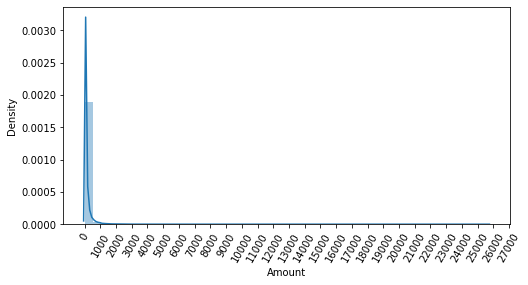

In [11]:
import seaborn as sns

plt.figure(figsize = (8,4))
plt.xticks(range(0,30000,1000), rotation = 60)
sns.distplot(card_df["Amount"])

In [12]:
#스케일링 정규화
from sklearn.preprocessing import StandardScaler

def get_preprocessed(df = None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy["Amount"].values.reshape(-1,1))
    
    df_copy.drop(["Time","Amount"], axis = 1, inplace = True)
    return df_copy



In [13]:
#amount 를 정규분포형태로 변환 후 로지스틱 회귀 및 ligthgbm 수행

X_train, X_test, y_train,y_test = get_train_test_dataset(card_df)

print("로지스틱 회귀 성능 예측")
get_model_train_eval(lr_clf, fir_train = X_train, fir_test = X_test, tgt_train=y_train, tgt_test=y_test)

print("ligthgbm 성능 예측")
get_model_train_eval(lgbm_clf, fir_train = X_train, fir_test = X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 성능 예측
오차행렬
[[85283    12]
 [   58    90]]
정확도 0.9992, 정밀도 0.8824, 재현율 0.6081, f1 0.7200, AUC 값 : 0.9713
ligthgbm 성능 예측
오차행렬
[[85288     7]
 [   38   110]]
정확도 0.9995, 정밀도 0.9402, 재현율 0.7432, f1 0.8302, AUC 값 : 0.9802


In [14]:
#로그 변환

def get_preprocessed(df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0,"Amount_Scaled", amount_n)
    
    df_copy.drop(["Time","Amount"], axis = 1, inplace = True)
    return df_copy



In [15]:
#amount 를 로그 변환 후 로지스틱 회귀 및 ligthgbm 수행

X_train, X_test, y_train,y_test = get_train_test_dataset(card_df)

print("로지스틱 회귀 성능 예측")
get_model_train_eval(lr_clf, fir_train = X_train, fir_test = X_test, tgt_train=y_train, tgt_test=y_test)

print("ligthgbm 성능 예측")
get_model_train_eval(lgbm_clf, fir_train = X_train, fir_test = X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 성능 예측
오차행렬
[[85283    12]
 [   59    89]]
정확도 0.9992, 정밀도 0.8812, 재현율 0.6014, f1 0.7149, AUC 값 : 0.9727
ligthgbm 성능 예측
오차행렬
[[85290     5]
 [   35   113]]
정확도 0.9995, 정밀도 0.9576, 재현율 0.7635, f1 0.8496, AUC 값 : 0.9796


### 이상치 제거

<AxesSubplot:>

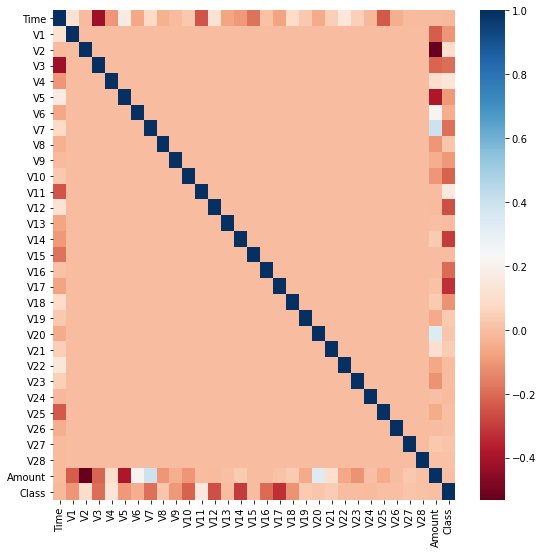

In [18]:
import seaborn as sns

plt.figure(figsize = (9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap = 'RdBu')

In [42]:
def get_outlier(df=None, column = None, weight = 1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values,25)
    quantile_75 = np.percentile(fraud.values,75)
    IQR = quantile_75 - quantile_25
    iqr_weight = IQR*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index


In [43]:
outlier_index = get_outlier(df=card_df, column = 'V14', weight = 1.5)
print("이상치 데이터 인덱스", outlier_index)

이상치 데이터 인덱스 Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [44]:
#로그 변환 후 이상치 삭제

def get_preprocessed(df = None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy["Amount"])
    df_copy.insert(0,"Amount_Scaled", amount_n)
    
    df_copy.drop(["Time","Amount"], axis = 1, inplace = True)
    
    outlier_index = get_outlier(df=df_copy, column = 'V14', weight = 1.5)
    df_copy.drop(outlier_index, axis = 0, inplace = True)
    
    
    return df_copy



In [45]:


X_train, X_test, y_train,y_test = get_train_test_dataset(card_df)

print("로지스틱 회귀 성능 예측")
get_model_train_eval(lr_clf, fir_train = X_train, fir_test = X_test, tgt_train=y_train, tgt_test=y_test)

print("ligthgbm 성능 예측")
get_model_train_eval(lgbm_clf, fir_train = X_train, fir_test = X_test, tgt_train=y_train, tgt_test=y_test)

로지스틱 회귀 성능 예측
오차행렬
[[85281    14]
 [   48    98]]
정확도 0.9993, 정밀도 0.8750, 재현율 0.6712, f1 0.7597, AUC 값 : 0.9743
ligthgbm 성능 예측
오차행렬
[[85290     5]
 [   25   121]]
정확도 0.9996, 정밀도 0.9603, 재현율 0.8288, f1 0.8897, AUC 값 : 0.9780


### SMOTE 기법의 오버샘플링 적용 후 모델 학습 평가

In [46]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_sample(X_train,y_train)
print("smote 적용 전 학습용 피쳐 레이블 데이터 세트", X_train.shape, y_train.shape)
print("smote 적용 gn 학습용 피쳐 레이블 데이터 세트", X_train_over.shape, y_train_over.shape)
print("smote 적용 후 레이블 값 분포", pd.Series(y_train_over).value_counts())



smote 적용 전 학습용 피쳐 레이블 데이터 세트 (199362, 29) (199362,)
smote 적용 gn 학습용 피쳐 레이블 데이터 세트 (398040, 29) (398040,)
smote 적용 후 레이블 값 분포 1    199020
0    199020
Name: Class, dtype: int64


In [47]:
lr_clf = LogisticRegression(max_iter=300)
get_model_train_eval(lr_clf, fir_train = X_train_over, fir_test = X_test, tgt_train=y_train_over, tgt_test=y_test)

오차행렬
[[82937  2358]
 [   11   135]]
정확도 0.9723, 정밀도 0.0542, 재현율 0.9247, f1 0.1023, AUC 값 : 0.9737


In [48]:
def precision_recall_curve_plot(Y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(Y_test, pred_proba_c1)
    
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall')
    
    plt.legend(); plt.grid()

    plt.show()


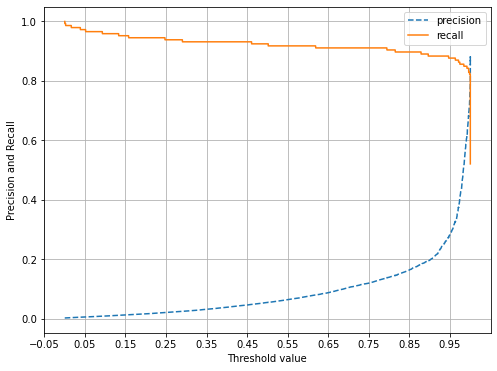

In [50]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [51]:
lgbm_clf = LGBMClassifier(n_estimators = 300, num_leaves = 64, n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf, fir_train = X_train_over, fir_test = X_test, tgt_train=y_train_over, tgt_test=y_test)


오차행렬
[[85282    13]
 [   22   124]]
정확도 0.9996, 정밀도 0.9051, 재현율 0.8493, f1 0.8763, AUC 값 : 0.9774
